<div class="alert alert-info" style="border-color: white; border-radius: 10px; background-color: white;"> 

# <font color = 'mediumaquamarine'> Анализ поведения пользователей мобильного приложения

<div class="alert alert-info" style="border-color: thistle; border-radius: 10px; background-color: thistle;"> 
    <font color = 'black'> 

**Описание проекта**

"Ненужные вещи" - мобильное приложение, в котором люди могут продавать свои ненужные вещи, размещая их на доске объявлений. Для улучшения приложения было принято решение об изучении поведения пользователей по событиям, которые они совершили в этом сервисе.   
        
*Цели:*     
- Управление вовлеченностью клиентов (адаптация приложения по целевой и смежной аудитории) на основе данных о поведении пользователей.  
- Получение гипотезы о том как можно было бы улучшить приложение с точки зрения пользовательского опыта.  
 
        
*Главные задачи:*   
- Изучить связь целевого события — просмотра контактов — и других действий пользователей.    
- Оценить, какие действия чаще совершают те пользователи, которые просматривают контакты.    
        
Для исследования были взяты в работу 2 датасета, которые содержат данные пользователей, впервые совершивших действия в приложении после 7 октября 2019 года.

<div class="alert alert-info" style="border-color: lavender; border-radius: 10px; background-color: lavender;"> 
    <font color = 'black'> 

**Декомпозиция**        

**1. Предобработка данных**  
 1.1. Изучить общую информацию о датасете (количество данных, какую информацию хранит каждый столбец);   
 1.2. Проверить корректность наименований колонок, исправить на общепринятый формат (нижний регистр и подчеркивание);  
 1.3. Просмотреть типы данных и привести к нужным при необходимости;  
 1.4. Исследовать пропущенные значения и заменить их;  
 1.5. Посмотреть дубликаты, удалить их при наличии.  


**2. Исследовательский анализ данных**  
 2.1. Изучить распределение данных по времени;  
 2.2. Проанализировать количество событий на каждого пользователя;   
 2.3. Рассчитать длительность сессий;   
 2.4. Вывод по проведенному анализу.
        
**3. Исследование целевого события - просмотра контактов**   
 3.1. Проанализировать связь целевого события — просмотра контактов — и других действий пользователей:     
      - В разрезе сессий отобрать сценарии\паттерны, которые приводят к просмотру контактов и построить диаграмму Санкея для выбора наиболее популярных сценариев;  
      - По выбранным сценариям построить воронки по основным сценариям в разрезе уникальных пользователей.   
 3.2. Оценить, какие действия чаще совершают те пользователи, которые просматривают контакты:   
      - Рассчитать относительную частоту каждого события в разрезе двух групп пользователей: группа пользователей, которые смотрели контакты `contacts_show` и группа пользователей, которые не смотрели контакты `contacts_show`, и сравнить показатели.  
 3.3. Написать вывод по полученным результатам.
        
**4. Проверка гипотез**       
4.1. Гипотеза 1: Конверсия в просмотры контактов различается у групп, где пользователи совершают действия `tips_show` (увидел рекомендованные объявления) и `tips_click` (кликнул по рекомендованному объявлению) и где пользователи совершают только `tips_show` (Нулевая гипотеза - конверсии существенно не различаются, Альтернативная гипотеза - конверсии различаются);    
4.2. Гипотеза 2: Конверсия в просмотры контактов различается у групп, где пользователи совершают действиe favorites_add (добавление в избранное) и где они его не совершают (Нулевая гипотеза - конверсии существенно не различаются, Альтернативная гипотеза - конверсии различаются).
        
**5. Выводы и рекомендации**  
 5.1. Написать общие выводы проведенного исследования;    
 5.2. Расписать рекомендации на основе полученных результатов.

## Предобработка данных

### Изучение общей информации

Как и в любом подобном проекте в первую очередь надо посмотреть на имеющиеся данные, сколько их, какую информацию хранят, и оценить степень необходимой предобработки. Загрузим нужные библиотеки и изучим датасеты.

In [1]:
# Загрузим библиотеки
import pandas as pd
import plotly.express as px
import numpy as np
from tqdm import tqdm
from plotly import graph_objects as go
import matplotlib.pyplot as plt
from scipy import stats as st
import math as mth

!pip install -U kaleido
import plotly.io as pio
pio.renderers.default = "svg"
svg_renderer = pio.renderers["svg"]
svg_renderer.scale = 1.1

In [2]:
# Прочитаем первый датасет
try:
    data_source = pd.read_csv('/datasets/mobile_sources.csv')
except:
    data_source = pd.read_csv('https://code.s3.yandex.net/datasets/mobile_sources.csv')
data_source.head()

,userId,source
0,020292ab-89bc-4156-9acf-68bc2783f894,other
1,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex
2,8c356c42-3ba9-4cb6-80b8-3f868d0192c3,yandex
3,d9b06b47-0f36-419b-bbb0-3533e582a6cb,other
4,f32e1e2a-3027-4693-b793-b7b3ff274439,google


Колонки в датасете data_source:
- `userId` — идентификатор пользователя,  
- `source` — источник, с которого пользователь установил приложение.

In [3]:
# Прочитаем второй датасет
try:
    data = pd.read_csv('/datasets/mobile_dataset.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/mobile_dataset.csv')
data.head()

,event.time,event.name,user.id
0,2019-10-07 00:00:00.431357,advert_open,020292ab-89bc-4156-9acf-68bc2783f894
1,2019-10-07 00:00:01.236320,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
2,2019-10-07 00:00:02.245341,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c
3,2019-10-07 00:00:07.039334,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
4,2019-10-07 00:00:56.319813,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c


Колонки в датасете data:
- `event.time` — время совершения,
- `user.id` — идентификатор пользователя,
- `event.name` — действие пользователя.

Виды действий в event.name:
- `advert_open` — открыл карточки объявления,
- `photos_show` — просмотрел фотографий в объявлении,
- `tips_show` — увидел рекомендованные объявления,
- `tips_click` — кликнул по рекомендованному объявлению,
- `contacts_show` и `show_contacts` — посмотрел номер телефона,
- `contacts_call` — позвонил по номеру из объявления,
- `map` — открыл карту объявлений,
- `search_1 — search_7` — разные действия, связанные с поиском по сайту,
- `favorites_add` — добавил объявление в избранное.

Таблицы хранят в себе уникальные индификаторы пользователей и информацию о совершенных ими событий/действий, внутри приложения, а именно время, наименование самого действия, а также источник, с которого было скачено приложение. Посмотрим теперь на данные чуть более подробно. 

In [4]:
# Выведем информацию по первой таблице
data_source.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4293 entries, 0 to 4292
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   userId  4293 non-null   object
 1   source  4293 non-null   object
dtypes: object(2)
memory usage: 67.2+ KB


In [5]:
# Выведем информацию по второй таблице
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74197 entries, 0 to 74196
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   event.time  74197 non-null  object
 1   event.name  74197 non-null  object
 2   user.id     74197 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


В датасете с источниками у нас есть 4293 строк, а во второй таблице 74197. Такая разница объясняется тем, что во втором датасете уникальные пользователи повторяются, так как каждый совершает несколько действий в самом приложении.

Также по выведенной информации можно заметить неправильный тип данных у колонки с датой и временем, который чуть позже придется поправить.

### Корректировка названий колонок

Чтобы сделать анализ более удобным, приведем колонки к общепринятому оформлению - нижний регистр и нижнее подчеркивание вместо точек или пробела.

In [6]:
# Поменяем названия колонок в первом датасете
data_source.columns = ['user_id', 'source']

# Поменяем названия колонок во втором датасете
data.columns = ['event_time', 'event_name', 'user_id']

Таблицы пересекаются друг с другом благодаря колонке с индификатором пользователя, поэтому мы могли бы их объединить по данному признаку, однако перед этим лучше проверить, сколько в каждом датасете уникальных айди.

In [7]:
# Выведем количество уникальных пользователей в двух датасетах
print(data_source['user_id'].nunique(),  
      data['user_id'].nunique())

4293 4293


Количество уникальных пользователей одинаково, поэтому можно спокойно объединить таблицы. Присоединим датасет с источниками к датасету с событиями, так как в нем больше данных.

In [8]:
# Объединим датасеты в один
data = data.merge(data_source, how='left', on='user_id')

# Проверим объединение
data.head(2)

,event_time,event_name,user_id,source
0,2019-10-07 00:00:00.431357,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,other
1,2019-10-07 00:00:01.236320,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other


### Изменение типа данных

Как выяснилось ранее, столбец с датой и временем следует привести к нужному типу данных (типу времени), так как его мы активно будем использовать далее. Также можем создать отдельный столбец с датой без времени.

In [9]:
# Изменим тип данных столбца event_time
data['event_time'] = pd.to_datetime(data['event_time'])

# Cоздадим отдельный столбец только с датой
data['date'] = pd.to_datetime(data['event_time'].dt.date)

# Проверим изменения
data.head(2)

,event_time,event_name,user_id,source,date
0,2019-10-07 00:00:00.431357,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,other,2019-10-07
1,2019-10-07 00:00:01.236320,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other,2019-10-07


In [10]:
# Проверим тип данных
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74197 entries, 0 to 74196
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   event_time  74197 non-null  datetime64[ns]
 1   event_name  74197 non-null  object        
 2   user_id     74197 non-null  object        
 3   source      74197 non-null  object        
 4   date        74197 non-null  datetime64[ns]
dtypes: datetime64[ns](2), object(3)
memory usage: 3.4+ MB


Изменения верны, теперь перейдем к поиску пропущенных значений.

### Проверка пропущенных значений

In [11]:
# Проверим пропущенные значения по каждому столбцу
data.isna().sum()

event_time    0
event_name    0
user_id       0
source        0
date          0
dtype: int64

Пропусков не обнаружено, можем проверить данные на наличие дубликатов.

### Проверка дубликатов

Сначала проверим наличие явных дубликатов, то есть целые одинаковые строки, а затем посмотрим на неявные дубликаты в отдельных столбцах.

In [12]:
# Посчитаем количество явных дубликатов в датасете
data.duplicated().sum()

0

Явных дубликатов нет. Теперь посмотрим на отдельные столбцы, где мы можем зафиксировать неявные дубликаты (например, повторная запись категории с источника/события с ошибкой). 

In [13]:
# Посмотрим уникальные значения в столбце source
data['source'].value_counts()

yandex    34286
google    20445
other     19466
Name: source, dtype: int64

Все данные записаны правильно, посмотрим теперь другой столбец event_name, где мы также можем что-то найти.

In [14]:
# Посмотрим уникальные значения в столбце event_name
data['event_name'].value_counts()

tips_show        40055
photos_show      10012
advert_open       6164
contacts_show     4450
map               3881
search_1          3506
favorites_add     1417
search_5          1049
tips_click         814
search_4           701
contacts_call      541
search_3           522
search_6           460
search_2           324
search_7           222
show_contacts       79
Name: event_name, dtype: int64

Все данные записаны правильно, однако есть дублирующиеся значения `contacts_show` и `show_contacts`. Как мы выяснили в самом начале, в этих колонках хранится одинаковая по смыслу информация, а именно просмотр номера телефона. Поэтому мы можем объединить эти два события в одно. Присоединим `show_contacts` к `contacts_show`, так как у последнего больше данных.

In [15]:
# Поменяем название события show_contacts на contacts_show
data['event_name'] = data['event_name'].replace('show_contacts', 'contacts_show')

# Проверим изменения
data['event_name'].value_counts()

tips_show        40055
photos_show      10012
advert_open       6164
contacts_show     4529
map               3881
search_1          3506
favorites_add     1417
search_5          1049
tips_click         814
search_4           701
contacts_call      541
search_3           522
search_6           460
search_2           324
search_7           222
Name: event_name, dtype: int64

Теперь количество событий `contacts_show` увеличилось на 79, чего мы и добивались. 
Уберем также разделение поиска на 1,2,3 и т.д., объединив все поиски в один `search` для удобства, так как в этом исследовании мы не будем рассматривать каждый поиск отдельно.

In [16]:
data['event_name'] = data['event_name'].str.replace('search_\d+', 'search', regex=True)

In [17]:
# Проверим работу функции
data['event_name'].value_counts()

tips_show        40055
photos_show      10012
search            6784
advert_open       6164
contacts_show     4529
map               3881
favorites_add     1417
tips_click         814
contacts_call      541
Name: event_name, dtype: int64

<div class="alert alert-info" style="border-color: lavender; border-radius: 10px; background-color: lavender;"> 
    <font color = 'black'> 
По итогам раздела можно сказать, что мы изучили представленные данные на начальном этапе, объединили датасеты, поменяли тип данных колонки со временем и дополнили общую таблицу колонкой с датой. Также были скорректированы названия колонок, проверены пропуски и дубликаты, было убрано дублирующееся действие в колонке `event_name`. Теперь можем приступать к исследовательскому анализу. 

## Исследовательский анализ данных

### Распределение данных по времени

Сначала стоит найти период времени, который у нас есть. Для этого просто выведем минимальное и максимальное значения в столбце с датой.

In [18]:
# Находим минимальную и максимальную даты
print(f"Данные распределены по времени от {(data['date'].dt.date).min()} до {(data['date'].dt.date).max()}")

Данные распределены по времени от 2019-10-07 до 2019-11-03


Значит мы имеем данные от 10 октября до 3 ноября 2019 года - примерно 3,5 недели. Теперь посмотрим на основные данные, построив столбчатые диаграммы в разрезе дат.

In [19]:
# Создадим столбец количеством каждого события по дням
events_grouped = data.groupby(['date', 'event_name']).agg(
    {'event_name':'count'}).rename(columns={'event_name':'event_count'}).reset_index()

# Выведем первые 5 строк таблицы
events_grouped.head(5)

,date,event_name,event_count
0,2019-10-07,advert_open,401
1,2019-10-07,contacts_call,7
2,2019-10-07,contacts_show,61
3,2019-10-07,favorites_add,40
4,2019-10-07,map,168


In [20]:
# Создадим функцию для визуализации
def bar_chart(data, x, y, color=None, title=None, xaxis_title=None, yaxis_title=None):
    '''Эта функция строит столбчатую диаграмму.
    В функцию в качестве обязательных аргументов подаются датасет и его колонки для осей X и Y, 
    а в качестве необязательных аргументов - колонка датасета для разделения внутри столбца диаграммы по цветам, 
    а также название графика, название для оси X и для оси Y.
    значение для сравнения и название сравниваемого показателя.
    
    Функция возвращает столбчатую диаграмму по рассматриваемым параметрам.
    '''
    fig = px.bar(data, x=x, y=y, color=color)
    fig.update_layout(title=title, xaxis_title=xaxis_title, yaxis_title=yaxis_title)
    fig.show()

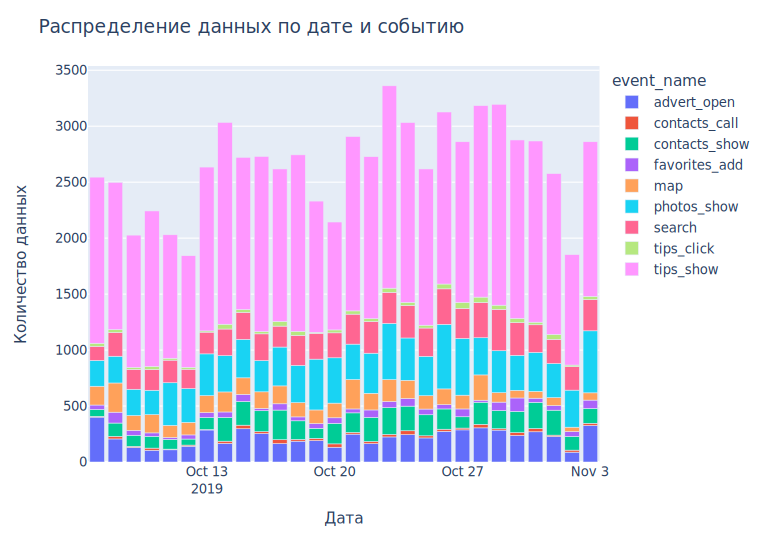

In [21]:
# Применим функцию
bar_chart(events_grouped, 'date', 'event_count', color='event_name', 
          title='Распределение данных по дате и событию', xaxis_title='Дата', yaxis_title='Количество данных')

По диаграмме видно, что наиболее часто встречающимися событиями практически каждый день являются просмотр фото, поиск и открытие карточки объявления (tips_show, то есть "увидел рекомендованные объявления" мы не включаем в этот список, так как это действие по сути совершается автоматически при входе в приложение). Реже всего в течение дня можно увидеть такие действия, как звонок по номеру из объявления, добавление в избранное и клик по рекомендованному объявлению. Звонок как редкое событие можно объяснить тем, что пользователи обычно не звонят через само приложение, а могут предпочитать списываться или же созваниваться вне приложения. Также можно сделать вывод, что пользователи предпочитают самостоятельный поиск рекомендованным обявлениям.  

Теперь посмотрим на источники скачивания приложения.

In [22]:
# Сгруппируем данные для визуализации
source_grouped = data.groupby(['date', 'source']).agg(
    {'source':'count'}).rename(columns={'source':'source_count'}).reset_index()

# Выведем для проверки первые 5 строк
source_grouped.head()

,date,source,source_count
0,2019-10-07,google,706
1,2019-10-07,other,590
2,2019-10-07,yandex,1249
3,2019-10-08,google,591
4,2019-10-08,other,542


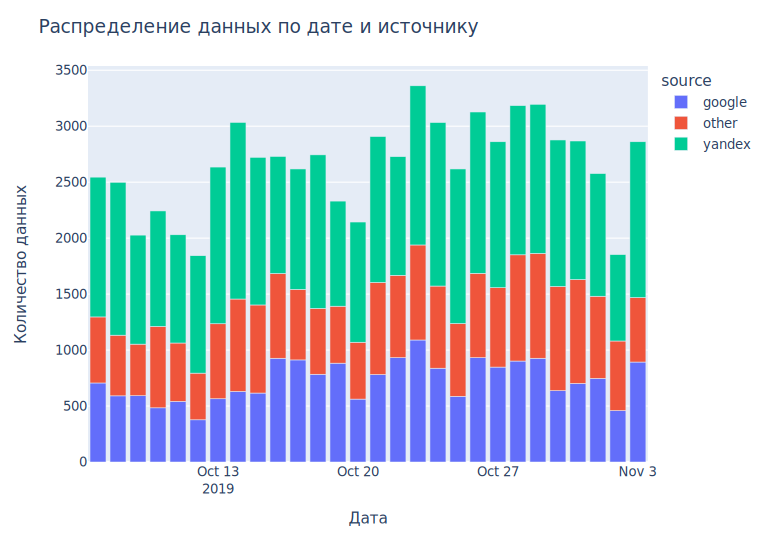

In [23]:
# Построим график по источникам в разрезе дат, используя функцию
bar_chart(source_grouped, 'date', 'source_count', color='source', 
          title='Распределение данных по дате и источнику', xaxis_title='Дата', yaxis_title='Количество данных')

Как мы видим по графику, Яндекс являлся стабильным лидером-источником установки приложения в течение всего периода времени. Гугл не показывает серьезной разницы с другими источниками, в какие-то дни скачиваний было больше с Гугла, а в иное время его обгоняли другие источники.

### Количество событий на каждого пользователя

Теперь посмотрим на статистические показатели по пользователям и их событиям. Уберем из данных для этого анализа событие "увидел рекомендованные объявления", так как это действие совершается автоматически при входе.

In [24]:
# Посчитаем количество событий на каждую дату
eventcnt = data.groupby(['user_id'])[['event_name']].agg({'event_name':'count'}).reset_index()

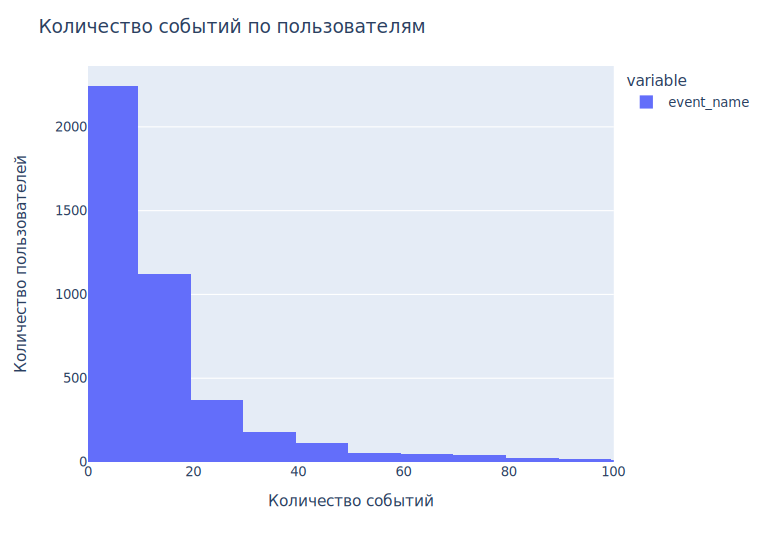

In [25]:
# Создадим график
fig = px.histogram(eventcnt['event_name'], nbins=85)
fig.update_layout(xaxis_title='Количество событий', yaxis_title='Количество пользователей', 
                  title='Количество событий по пользователям')
fig.update_xaxes(range=[0, 100])
fig.show()

In [26]:
# Выведем основную статистику по полученному распределению данных
eventcnt.describe(percentiles=[0.25, 0.50, 0.75, 0.90, 0.95, 0.99]).round(3)

,event_name
count,4293.000
mean,17.283
std,29.131
min,1.000
25%,5.000
50%,9.000
75%,17.000
90%,36.000
95%,59.000
99%,132.000


Cудя по полученным результатам, в данных есть выбросы, что видно по графику и максимальному значению 478. Однако так как в данном исследовании мы изучаем поведение пользователей через произошедшие события, то будет лучше их не трогать. В основном пользователи совершают до 20 событий, половина всех пользователей совершила до 9 действий, 25% произвело более 17 событий, 5% от всех пользователей совершили более 60 действий. Минимальное количество действий равно единице, что логично, так как многие могли  зайти в приложение и сразу выйти, то есть совершив только действие "просмотр рекомендательных объявлений".

### Длительность сессий

Разделение сессий нам необходимо, чтобы после с помощью них выделить сценарии действий пользователей в приложении и рассчитать по ним воронки. Сессии можно выделить двумя основными способами: установив календарный день за одну сессию или же применив тайм-ауты. Тайм-аут сессии - это интервал времени бездействия пользователя, после которого считается, что пользовательская сессия закончилась. Такой вариант довольно сложен, но обеспечивает высокой точностью результатов, поэтому воспользуемся им.

In [27]:
# Создадим функцию для разделения сессий
def session(data, time_out):
    """Эта функция разделяет сессии пользователей.

    В функцию вводится датасет и нужное значение тайм-аута. В итоге сессии выделяются и после рассчитывается
    длительность каждой сессии по пользователям.
    
    Функция возвращает датасет с добавленной колонкой с сессиями.
    """
    data_ss = data.sort_values(['user_id', 'event_time'], ignore_index=True)
    g = (data_ss.groupby('user_id')['event_time'].diff() > pd.Timedelta(time_out)).cumsum()
    data_ss['session'] = data_ss.groupby(['user_id', g], sort=False).ngroup() + 1
    
    return data_ss

Теперь применим функцию и попробуем ввести время тайм-аута 25 минут, далее мы сможем увидеть, какая получается средняя продолжительность сессии при таком интервале.

In [28]:
# Применим функцию к нашим данным, поставив тайм-аут в 30 минут
data_ss = session(data, '25min')

# Выведем первые 10 строк новой таблицы
data_ss.head(10)

,event_time,event_name,user_id,source,date,session
0,2019-10-07 13:39:45.989359,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07,1
1,2019-10-07 13:40:31.052909,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07,1
2,2019-10-07 13:41:05.722489,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07,1
3,2019-10-07 13:43:20.735461,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07,1
4,2019-10-07 13:45:30.917502,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07,1
5,2019-10-07 13:45:43.212340,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07,1
6,2019-10-07 13:46:31.033718,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07,1
7,2019-10-07 13:47:32.860234,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07,1
8,2019-10-07 13:49:41.716617,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07,1
9,2019-10-09 18:33:55.577963,map,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-09,2


Тепень сгруппируем данные по пользователям и сессиям, и найдем продолжительность сессий. 

In [29]:
# Сгруппируем данные по пользователям и их сессиям
data_ss_gr = data_ss.groupby(['user_id', 'session'])

# Рассчитаем продолжительность сессий (из конца сессии вычтем начало по времени)
ses_duration = (data_ss_gr['event_time'].max() - data_ss_gr['event_time'].min())

# Преобразуем таблицу в стандартный вид
ses_duration = ses_duration.to_frame().rename(columns={'event_time':'duration'}).reset_index()

# Выведем первые пять строк
ses_duration.head()

,user_id,session,duration
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,1,0 days 00:09:55.727258
1,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2,0 days 00:08:27.385985
2,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,3,0 days 00:14:59.272096
3,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,4,0 days 00:12:38.171767
4,00157779-810c-4498-9e05-a1e9e3cedf93,5,0 days 00:25:20.787329


Рассчитаем получившуюся среднюю длительность сессии в нашем датасете.

In [30]:
print('Cредняя длительность сессии при тайм-ауте в 25 минут: {}'.format(ses_duration['duration'].mean()))

Cредняя длительность сессии при тайм-ауте в 25 минут: 0 days 00:11:52.574882615


Для разделения сессий мы взяли интервал времени бездействия пользователя в 25 минут и рассчитали, какая получается средняя длительность сессии при таком тайм-ауте. В итоге средняя продолжительность оказалась примерно 12 минут (11.52). Как мы выяснили ранее из отчета компании *Adjust*, средняя длительность сессии в 2019 составляла около 10,5 минут, а в 2020 - 11. Если учитывать рост продолжительности одной сессии с 2019 по 2021 (19,09-20,31 мин.), то поэтому такие показатели тайм-аута и средней продолжительности имеют место быть, поэтому оставим так.

In [31]:
sort = data.sort_values(['event_time'])
sort['time_diff'] = sort['event_time'].diff()
print(sort['time_diff'].describe())
print(sort['time_diff'].quantile([0.80, 0.85, 0.90, 0.95, 0.99]))

count                        74196
mean     0 days 00:00:32.604077054
std      0 days 00:03:13.256360544
min         0 days 00:00:00.000001
25%      0 days 00:00:04.720981250
50%      0 days 00:00:13.006695500
75%         0 days 00:00:30.894998
max         0 days 03:38:21.375306
Name: time_diff, dtype: object
0.80      0 days 00:00:37.293100
0.85   0 days 00:00:46.540382500
0.90   0 days 00:01:00.814640500
0.95   0 days 00:01:30.842338250
0.99   0 days 00:03:52.930637300
Name: time_diff, dtype: timedelta64[ns]


У нас 75% временных разниц между соседними событиями составляют менее ~30 минут. 
Как указано в статье про веб-аналитику (https://searchengines.guru/ru/articles/40879), во многих аналитических счетчиках тайм-аут настраивается автоматически на 30 минут. 
Установим наш тайм-аут в 30 минут.

In [32]:
data_ss = session(data, '30min')

# Выведем первые 10 строк новой таблицы
data_ss.head(10)

,event_time,event_name,user_id,source,date,session
0,2019-10-07 13:39:45.989359,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07,1
1,2019-10-07 13:40:31.052909,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07,1
2,2019-10-07 13:41:05.722489,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07,1
3,2019-10-07 13:43:20.735461,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07,1
4,2019-10-07 13:45:30.917502,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07,1
5,2019-10-07 13:45:43.212340,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07,1
6,2019-10-07 13:46:31.033718,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07,1
7,2019-10-07 13:47:32.860234,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07,1
8,2019-10-07 13:49:41.716617,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07,1
9,2019-10-09 18:33:55.577963,map,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-09,2


### Вывод по разделу

<div class="alert alert-info" style="border-color: lavender; border-radius: 10px; background-color: lavender;"> 
    <font color = 'black'> 
        
- Наиболее часто встречающиеся события по каждому дню: просмотр фото, поиск и открытие карточки обявления;
- В течение каждого дня Яндекс являлся лидером по источнику искачивания приложения;
- В основном пользователи совершали до 20 событий, половина всех пользователей совершила до 9 действий, 5% от всех пользователей совершили более 60 действий. 

## Исследование целевого события - просмотра контактов

### Анализ связи целевого события и других действий пользователей

- В разрезе сессий отобрать сценарии\паттерны, которые приводят к просмотру контактов с помощью диаграммы Санкея (выбрать 3 наиболее популярных сценария);  
- По выбранным сценариям построить воронки в разрезе уникальных пользователей.  

Для начала отберем данные. Нам не потребуется вся таблица предыдущего анализа, нужны будут только три столбца: сессии, время и название события.

In [33]:
# Отбираем данные
data_new = data_ss.loc[:, ['session', 'event_time', 'event_name']]
data_new.head()

,session,event_time,event_name
0,1,2019-10-07 13:39:45.989359,tips_show
1,1,2019-10-07 13:40:31.052909,tips_show
2,1,2019-10-07 13:41:05.722489,tips_show
3,1,2019-10-07 13:43:20.735461,tips_show
4,1,2019-10-07 13:45:30.917502,tips_show


In [34]:
# Удаляем дубликаты по событиям в сессиях
data_new.drop_duplicates(subset=['session', 'event_name'], inplace=True)

In [35]:
# Cмотрим результат
data_new.head()

,session,event_time,event_name
0,1,2019-10-07 13:39:45.989359,tips_show
9,2,2019-10-09 18:33:55.577963,map
11,2,2019-10-09 18:40:28.738785,tips_show
13,3,2019-10-21 19:52:30.778932,tips_show
15,3,2019-10-21 19:53:38.767230,map


Теперь приступим к построению диаграммы Санкея. Для нее нам потребуется написать несколько функций.

In [36]:
# Cтроим первую функцию
def add_features(df):
    """Функция генерации новых столбцов для исходной таблицы
    Args:
        df (pd.DataFrame): исходная таблица.
    Returns:
        pd.DataFrame: таблица с новыми признаками.
    """
    # сортируем по id и времени
    sorted_data = data_new.sort_values(by=['session', 'event_time']).copy()
    # добавляем шаги событий
    sorted_data['step'] = sorted_data.groupby('session').cumcount() + 1
    
    # добавляем узлы-источники и целевые узлы
    # узлы-источники - это сами события
    sorted_data['source'] = sorted_data['event_name']
    # добавляем целевые узлы
    sorted_data['target'] = sorted_data.groupby('session')['source'].shift(-1)
    
    # возврат таблицы без имени событий
    return sorted_data.drop(['event_name'], axis=1)
  
# преобразуем таблицу
data_newone = add_features(data_new)
data_newone.head()

,session,event_time,step,source,target
0,1,2019-10-07 13:39:45.989359,1,tips_show,NaN
9,2,2019-10-09 18:33:55.577963,1,map,tips_show
11,2,2019-10-09 18:40:28.738785,2,tips_show,NaN
13,3,2019-10-21 19:52:30.778932,1,tips_show,map
15,3,2019-10-21 19:53:38.767230,2,map,NaN


Теперь нужно отобрать максимальное количество шагов. Посмотрим на перцентили.

In [37]:
# Cмотрим на перцентили
data_newone['step'].describe([0.95, 0.99])

count    17854.000000
mean         1.592752
std          0.822576
min          1.000000
50%          1.000000
95%          3.000000
99%          4.000000
max          6.000000
Name: step, dtype: float64

Отберем 4 шага в виде максимума (99%).

In [38]:
# Отбираем шаги в данных 
data_comp = data_newone[data_newone['step'] <= 4].copy().reset_index(drop=True)

In [39]:
# Cтроим вторую функцию
def get_source_index(df):
    """Функция генерации индексов source
    Args:
        df (pd.DataFrame): исходная таблица с признаками step, source, target.
    Returns:
        dict: словарь с индексами, именами и соответсвиями индексов именам source.
    """ 
    res_dict = {}
    
    count = 0
    # получаем индексы источников
    for no, step in enumerate(df['step'].unique().tolist()):
        # получаем уникальные наименования для шага
        res_dict[no+1] = {}
        res_dict[no+1]['sources'] = df[df['step'] == step]['source'].unique().tolist()
        res_dict[no+1]['sources_index'] = []
        for i in range(len(res_dict[no+1]['sources'])):
            res_dict[no+1]['sources_index'].append(count)
            count += 1
            
    # соединим списки
    for key in res_dict:
        res_dict[key]['sources_dict'] = {}
        for name, no in zip(res_dict[key]['sources'], res_dict[key]['sources_index']):
            res_dict[key]['sources_dict'][name] = no
    return res_dict
  

# создаем словарь
source_indexes = get_source_index(data_comp)

In [40]:
# Cтроим третью функцию
def generate_random_color():
    
    """Случайная генерация цветов rgba
    Args:    
    Returns:
        str: Строка со сгенерированными параметрами цвета
    """ 
    # сгенерим значение для каждого канала
    r, g, b = np.random.randint(255, size=3)
    return f'rgba({r}, {g}, {b}, 1)'

In [41]:
# Cтроим четвертую функцию
def colors_for_sources(mode):
    
    """Генерация цветов rgba
    Args:
        mode (str): сгенерировать случайные цвета, если 'random', а если 'custom' - 
                    использовать заранее подготовленные
    Returns:
        dict: словарь с цветами, соответствующими каждому индексу
    """
    # словарь, в который сложим цвета в соответствии с индексом
    colors_dict = {}
    
    if mode == 'random':
        # генерим случайные цвета
        for label in data_comp['source'].unique():
            r, g, b = np.random.randint(255, size=3)            
            colors_dict[label] = f'rgba({r}, {g}, {b}, 1)'          
    else:
        print('Mistake')
            
    return colors_dict
   
# генерим цвета
colors_dict = colors_for_sources(mode='random')

In [42]:
# Cтроим пятую функцию
def percent_users(sources, targets, values):
    
    """
    Расчет уникальных id в процентах (для вывода в hover text каждого узла) 
    Args:
        sources (list): список с индексами source.
        targets (list): список с индексами target.
        values (list): список с "объемами" потоков.      
    Returns:
        list: список с "объемами" потоков в процентах
    """ 
    # объединим источники и метки и найдем пары
    zip_lists = list(zip(sources, targets, values))
    
    new_list = []
    # подготовим список словарь с общим объемом трафика в узлах
    unique_dict = {}
    # проходим по каждому узлу
    for source, target, value in zip_lists:
        if source not in unique_dict:
            # находим все источники и считаем общий трафик
            unique_dict[source] = 0
            for sr, tg, vl in zip_lists:
                if sr == source:
                    unique_dict[source] += vl                 
    # считаем проценты
    for source, target, value in zip_lists:
        new_list.append(round(100 * value / unique_dict[source], 1))
    
    return new_list

In [43]:
# Cтроим шестую функцию
def lists_for_plot(source_indexes=source_indexes, colors=colors_dict, frac=10):
    """
    Создаем необходимые для отрисовки диаграммы переменные списков и возвращаем
    их в виде словаря 
    Args:
        source_indexes (dict): словарь с именами и индексами source.
        colors (dict): словарь с цветами source.
        frac (int): ограничение на минимальный "объем" между узлами.     
    Returns:
        dict: словарь со списками, необходимыми для диаграммы.
    """
    sources = []
    targets = []
    values = []
    labels = []
    link_color = []
    link_text = []

    # проходим по каждому шагу
    for step in tqdm(sorted(data_comp['step'].unique()), desc='Шаг'):
        if step + 1 not in source_indexes:
            continue

        # получаем индекс источника
        temp_dict_source = source_indexes[step]['sources_dict']

        # получаем индексы цели
        temp_dict_target = source_indexes[step+1]['sources_dict']

        # проходим по каждой возможной паре, считаем количество таких пар
        for source, index_source in tqdm(temp_dict_source.items()):
            for target, index_target in temp_dict_target.items():
                # делаем срез данных и считаем количество id            
                temp_df = data_comp[(data_comp['step'] == step)&(data_comp['source'] == source)&(data_comp['target'] == target)]
                value = len(temp_df)
                # проверяем минимальный объем потока и добавляем нужные данные
                if value > frac:
                    sources.append(index_source)
                    targets.append(index_target)
                    values.append(value)
                    # делаем поток прозрачным для лучшего отображения
                    link_color.append(colors[source].replace(', 1)', ', 0.2)'))
                    
    labels = []
    colors_labels = []
    for key in source_indexes:
        for name in source_indexes[key]['sources']:
            labels.append(name)
            colors_labels.append(colors[name])
            
    # посчитаем проценты всех потоков
    perc_values = percent_users(sources, targets, values)
    
    # добавим значения процентов для howertext
    link_text = []
    for perc in perc_values:
        link_text.append(f"{perc}%")
    
    # возвратим словарь с вложенными списками
    return {'sources': sources, 
            'targets': targets, 
            'values': values, 
            'labels': labels, 
            'colors_labels': colors_labels, 
            'link_color': link_color, 
            'link_text': link_text}
  

# создаем словарь
data_for_plot = lists_for_plot()

Шаг: 100%|████████████████████████████████████████| 4/4 [00:00<00:00,  9.99it/s]


In [44]:
# Cтроим седьмую функцию - саму диаграмму
def plot_senkey_diagram(data_dict=data_for_plot):    
    """
    Функция для генерации объекта диаграммы Сенкей    
    Args:
        data_dict (dict): словарь со списками данных для построения.      
    Returns:
        plotly.graph_objs._figure.Figure: объект изображения.
    """ 
    fig = go.Figure(data=[go.Sankey(
        domain = dict(
          x =  [0,1],
          y =  [0,1]
        ),
        orientation = "h",
        valueformat = ".0f",
        node = dict(
          pad = 50,
          thickness = 15,
          line = dict(color = "black", width = 0.1),
          label = data_dict['labels'],
          color = data_dict['colors_labels']
        ),
        link = dict(
          source = data_dict['sources'],
          target = data_dict['targets'],
          value = data_dict['values'],
          label = data_dict['link_text'],
          color = data_dict['link_color']
      ))])
    fig.update_layout(title_text="Sankey Diagram", font_size=10, width=950, height=760)
    
    # возвращаем объект диаграммы
    return fig
  
# сохраняем диаграмму в переменную
senkey_diagram = plot_senkey_diagram()

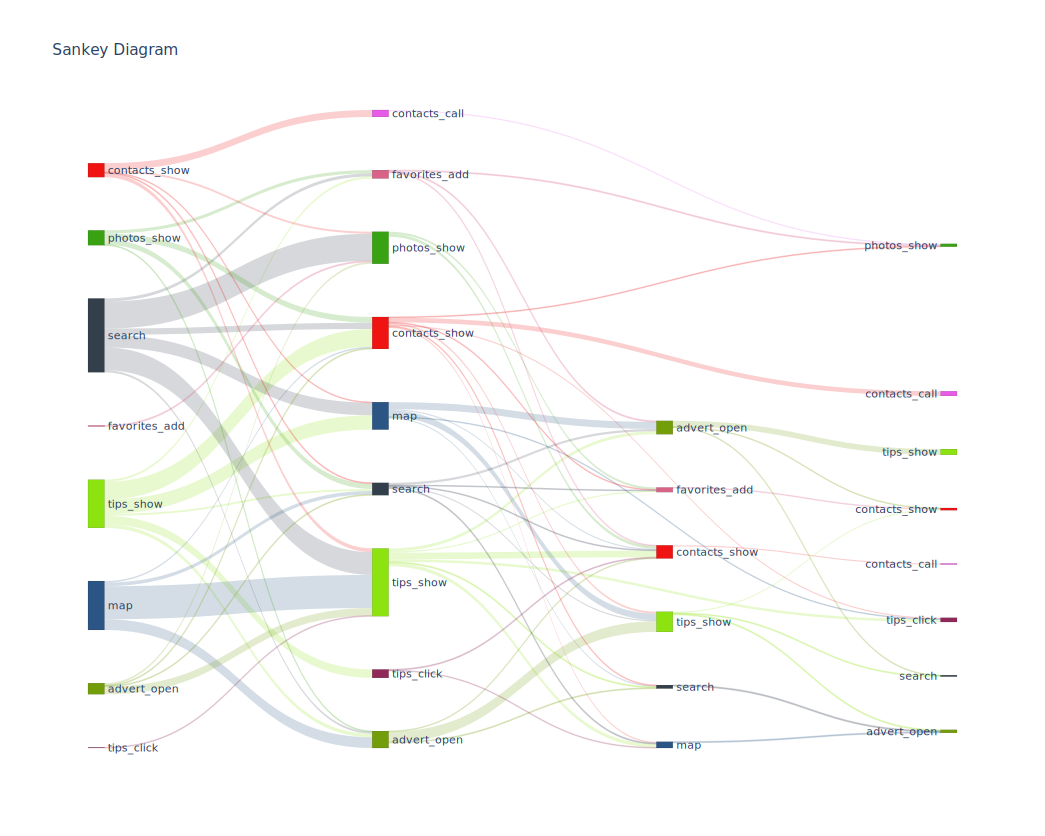

In [45]:
# Применяем функцию - строим диаграмму
senkey_diagram.show()

Наиболее популярные сценарии отбираются по толщине потоков каждого шага. Наша задача - найти те сценарии, которые приводят в итоге к целевому действию (просмотр контактов/contacts_show). Если смотреть на глаз, то в целом наиболее популярными можно назвать следующие сценарии:
- search - tips_show - contacts_show
- search - photos_show - contacts_show
- map - tips_show - contacts_show

Теперь построим воронки по каждому сценарию.

- **Сценарий 1: search - tips_show - contacts_show**

Рассчитаем количество перешедших пользователей на следующий этап.

In [46]:
# КОД РЕВЬЮЕРА

data_ss.query('event_name == "search"')['user_id'].nunique()

1666

In [47]:
# Находим количество уникальных пользователей с событием search
search = data_ss[data_ss['event_name'] == "search"]['user_id'].nunique()

# Фильтруем по найденным уникальным пользователям исходный датасет
# Находим количество уникальных пользователей с событием tips_show
data_ss_2 = data_ss[data_ss['user_id'].isin(data_ss.query('event_name == "search"')['user_id'].unique())]
tp_s = data_ss_2[data_ss_2['event_name'] == "tips_show"]['user_id'].nunique()

# Таким же способом находим количество уникальных пользователей с событием contacts_show
data_ss_3 = data_ss[data_ss['user_id'].isin(data_ss_2.query('event_name == "tips_show"')['user_id'].unique())]
co_s = data_ss_3[data_ss_3['event_name'] == "contacts_show"]['user_id'].nunique()

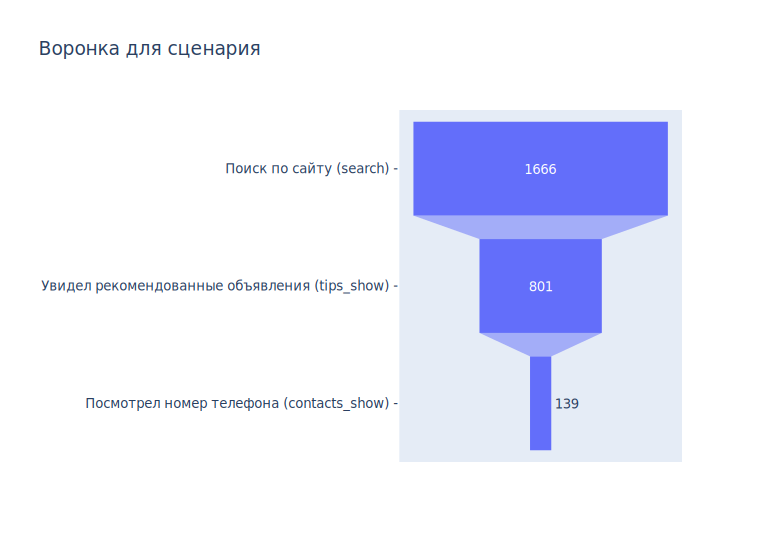

In [48]:
# Строим функцию для воронки
def plot_funnel(labels, values, title='Воронка для сценария'):
    fig = px.funnel(y=labels, x=values, title=title)
    fig.update_layout(yaxis_title='')
    fig.show()

# Создание воронки 1
plot_funnel(labels=['Поиск по сайту (search) -', 
                    'Увидел рекомендованные объявления (tips_show) -', 
                    'Посмотрел номер телефона (contacts_show) -'], 
            values=[search, tp_s, co_s])


In [49]:
print(f'Конверсия по первому сценарию: {round(((co_s/search)*100), 2)}%')

Конверсия по первому сценарию: 8.34%


- **Сценарий 2: search - photos_show - contacts_show**

In [50]:
# Находим количество уникальных пользователей с событием search
search = data_ss[data_ss['event_name'] == "search"]['user_id'].nunique()

# Фильтруем по найденным уникальным пользователям исходный датасет
# Находим количество уникальных пользователей с событием photos_show
data_ss_22 = data_ss[data_ss['user_id'].isin(data_ss.query('event_name == "search"')['user_id'].unique())]
ph_s = data_ss_22[data_ss_22['event_name'] == "photos_show"]['user_id'].nunique()

# Таким же способом находим количество уникальных пользователей с событием contacts_show
data_ss_33 = data_ss[data_ss['user_id'].isin(data_ss_22.query('event_name == "photos_show"')['user_id'].unique())]
co_s2 = data_ss_33[data_ss_33['event_name'] == "contacts_show"]['user_id'].nunique()

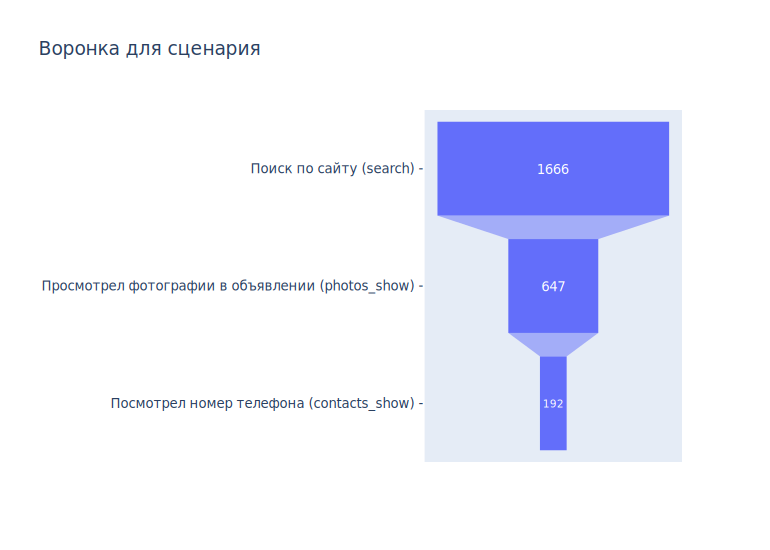

In [51]:
# Создание воронки 2
plot_funnel(labels=['Поиск по сайту (search) -', 
                    'Просмотрел фотографии в объявлении (photos_show) -', 
                    'Посмотрел номер телефона (contacts_show) -'], 
            values=[search, ph_s, co_s2])


In [52]:
print(f'Конверсия по второму сценарию: {round(((co_s2/search)*100), 2)}%')

Конверсия по второму сценарию: 11.52%


- **Сценарий 3: map - tips_show - contacts_show**

In [53]:
# Находим количество уникальных пользователей с событием map
maps = data_ss[data_ss['event_name'] == "map"]['user_id'].nunique()

# Фильтруем по найденным уникальным пользователям исходный датасет
# Находим количество уникальных пользователей с событием tips_show
data_ss_4 = data_ss[data_ss['user_id'].isin(data_ss.query('event_name == "map"')['user_id'].unique())]
tp_s2 = data_ss_4[data_ss_4['event_name'] == "tips_show"]['user_id'].nunique()

# Таким же способом находим количество уникальных пользователей с событием contacts_show
data_ss_5 = data_ss[data_ss['user_id'].isin(data_ss_4.query('event_name == "tips_show"')['user_id'].unique())]
co_s3 = data_ss_5[data_ss_5['event_name'] == "contacts_show"]['user_id'].nunique()

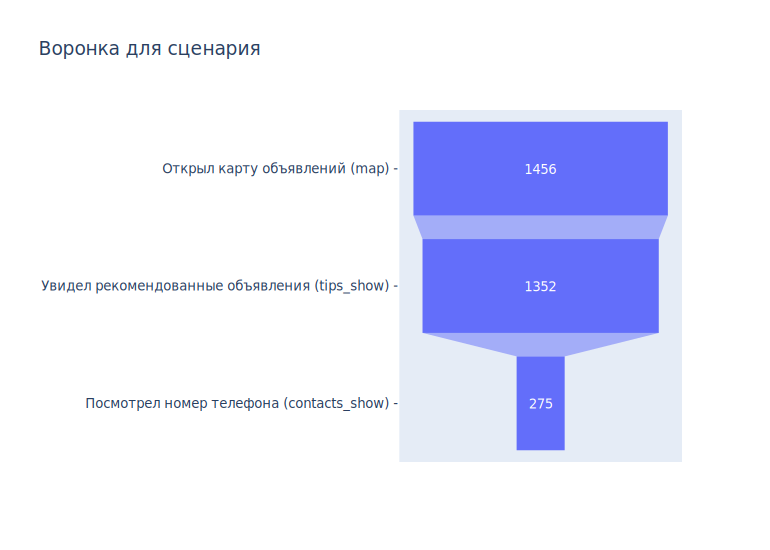

In [54]:
# Создание воронки 3
plot_funnel(labels=['Открыл карту объявлений (map) -', 
                    'Увидел рекомендованные объявления (tips_show) -', 
                    'Посмотрел номер телефона (contacts_show) -'], 
            values=[maps, tp_s2, co_s3])


In [55]:
print(f'Конверсия по третьему сценарию: {round(((co_s3/maps)*100), 2)}%')

Конверсия по третьему сценарию: 18.89%


**В итоге:**

- Три наиболее популярных сценария действий пользователя в приложении:  
1. search - tips_show - contacts_show  
2. search - photos_show - contacts_show  
3. map - tips_show - contacts_show  

- Два сценария начинаются с поиска, что еще раз показывает разницу влияния самостоятельного поиска пользователя и рекомендаций на входе.
- Также два сценария в качестве второго шага имеют показ рекомендованных обяъвлений, что логично увидеть после таких действий пользователя, как поиск и открытие карты объявлений. 
- Наибольшую конверсию от первого до последнего шага показывает третий сценарий (почти 19%), а наименьший - первый сценарий (почти 8%). 
- На втором шаге наименьшую конверсию показывает просмотр фотографий во втором сценарии;
- В третьем сценарии получилось много перешедших пользователей с первого события, однако действие "увидел рекомендованные объявления" может быть автоматическим после события "открыл доску объявлений". Тогда непонятно, почему у этих событий разница практически в 100 человек. Возможно здесь могли быть технические затруднения.


### Какие действия чаще совершают те пользователи, которые просматривают контакты  

- Рассчитать относительную частоту каждого события в разрезе двух групп пользователей: группа пользователей, которые смотрели контакты `contacts_show` и группа пользователей, которые не смотрели контакты `contacts_show`, и сравнить показатели. 

In [56]:
# Выделяем данные с пользователями, которые просмотрели контакты
cs_yes = data.loc[data['event_name'] == 'contacts_show']

In [57]:
# Создаем отдельный столбец с True, False, где True - пользователь просматривал контакты
data['contacts_show_yes'] = data['user_id'].isin(cs_yes['user_id'])

In [58]:
# Выводим таблицу
data.head()

,event_time,event_name,user_id,source,date,contacts_show_yes
0,2019-10-07 00:00:00.431357,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,other,2019-10-07,False
1,2019-10-07 00:00:01.236320,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other,2019-10-07,False
2,2019-10-07 00:00:02.245341,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex,2019-10-07,False
3,2019-10-07 00:00:07.039334,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other,2019-10-07,False
4,2019-10-07 00:00:56.319813,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex,2019-10-07,False


In [59]:
# Группируем данные по событиям и количеством просмотревших целевое событие
cs_count = data.groupby(['event_name']).agg(event_count=('event_name', 'count'),
                                        contacts_show_yes=('contacts_show_yes', 'sum')).reset_index()
cs_count

,event_name,event_count,contacts_show_yes
0,advert_open,6164,1589
1,contacts_call,541,541
2,contacts_show,4529,4529
3,favorites_add,1417,424
4,map,3881,1101
5,photos_show,10012,3828
6,search,6784,2084
7,tips_click,814,333
8,tips_show,40055,12768


In [60]:
# Создаем столбец с количество пользователей, не просмотревших контакты по событиям
cs_count['contacts_show_not'] = cs_count['event_count'] - cs_count['contacts_show_yes']

# Рассчитываем относительную частоту просмотревших контакты по каждому событию
cs_count['ratio_yes'] = round(((cs_count['contacts_show_yes']/cs_count['event_count'])*100), 1)

# Делаем то же самое с другой группой пользователей
cs_count['ratio_not'] = round(((cs_count['contacts_show_not']/cs_count['event_count'])*100), 1)

In [61]:
# Проверяем
cs_count

,event_name,event_count,contacts_show_yes,contacts_show_not,ratio_yes,ratio_not
0,advert_open,6164,1589,4575,25.8,74.2
1,contacts_call,541,541,0,100.0,0.0
2,contacts_show,4529,4529,0,100.0,0.0
3,favorites_add,1417,424,993,29.9,70.1
4,map,3881,1101,2780,28.4,71.6
5,photos_show,10012,3828,6184,38.2,61.8
6,search,6784,2084,4700,30.7,69.3
7,tips_click,814,333,481,40.9,59.1
8,tips_show,40055,12768,27287,31.9,68.1


In [62]:
# Создаем столбец с количество пользователей, не просмотревших контакты по событиям
cs_count['ratio_gr1'] = round(
    ((cs_count['contacts_show_yes']/cs_count['contacts_show_yes'].sum())*100),2)

# Рассчитываем относительную частоту просмотревших контакты по каждому событию
cs_count['ratio_gr2'] = round(
    ((cs_count['contacts_show_not']/cs_count['contacts_show_not'].sum())*100),2)

cs_count

,event_name,event_count,contacts_show_yes,contacts_show_not,ratio_yes,ratio_not,ratio_gr1,ratio_gr2
0,advert_open,6164,1589,4575,25.8,74.2,5.84,9.73
1,contacts_call,541,541,0,100.0,0.0,1.99,0.00
2,contacts_show,4529,4529,0,100.0,0.0,16.65,0.00
3,favorites_add,1417,424,993,29.9,70.1,1.56,2.11
4,map,3881,1101,2780,28.4,71.6,4.05,5.91
5,photos_show,10012,3828,6184,38.2,61.8,14.08,13.16
6,search,6784,2084,4700,30.7,69.3,7.66,10.00
7,tips_click,814,333,481,40.9,59.1,1.22,1.02
8,tips_show,40055,12768,27287,31.9,68.1,46.95,58.06


В нашей таблице есть два события, которые показывают 100 процентов по группе просмотревших контакты - это само целевое событие и звонок контакту. Логично, что позвонить с приложения нельзя не просмотрев при этом контакт, поэтому и 100 процентов. Однако для нашего сравнения эти два события будут мешать, поэтому уберем их.

In [63]:
# Убираем contacts_call и contacts_show
cs_count = cs_count[(cs_count['event_name'] != 'contacts_call') & (cs_count['event_name'] != 'contacts_show')]

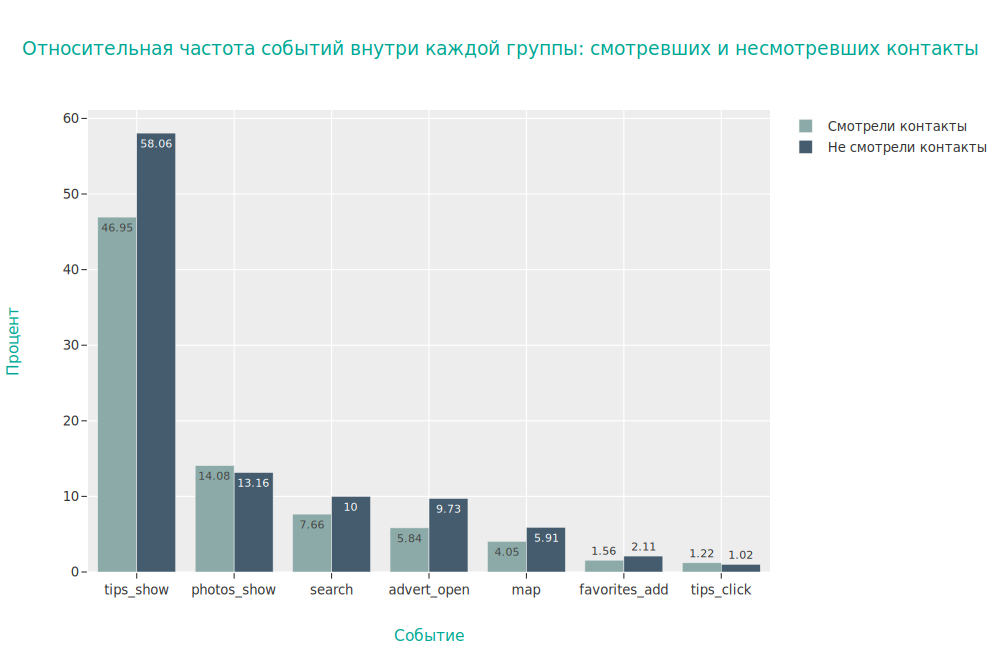

In [64]:
# Строим график
fig = go.Figure()
fig.add_trace(go.Bar(x=cs_count['event_name'], y=cs_count['ratio_gr1'], 
                     name='Cмотрели контакты', marker_color='#8caba8', text=cs_count['ratio_gr1']))
fig.add_trace(go.Bar(x=cs_count['event_name'], y=cs_count['ratio_gr2'], 
                     name='Не смотрели контакты', marker_color='#445c6d', text=cs_count['ratio_gr2']))

fig.update_layout(
    title='Относительная частота событий внутри каждой группы: смотревших и несмотревших контакты',
    xaxis_title='Событие',
    yaxis_title='Процент',
    template='ggplot2',
    xaxis_title_font=dict(color='#00a693'),  
    yaxis_title_font=dict(color='#00a693'), 
    title_font=dict(color='#00a693'),
    xaxis_title_standoff=30,
    yaxis_title_standoff=30,
    height=600,
    width=910,
    xaxis={'categoryorder': 'total descending'})
fig.update_traces(textfont=dict(size=10))
fig.show()

В итоге мы видим, что по каждому событию по большей части лидирует группа пользователей, которые так и не посмотрели контакты в объявлениях. Однако другая ситуация представлена по событиям "просмотрел фото" и "кликнул на рекомендованное объявление". Наибольшая разница между группами наблюдается по событию tips_show ("увидел рекомендованные объявления").

### Вывод

<div class="alert alert-info" style="border-color: lavender; border-radius: 10px; background-color: lavender;"> 
    <font color = 'black'> 
        
Мы выявили три сценария, которые могут сказать нам о том, как примерно предпочитают действовать пользователи в приложении. Чаще всего они предпочитают самостоятельный поиск и до целевого чаще добираются в два шага (search - tips_show - contacts_show / search - photos_show - contacts_show / map - tips_show - contacts_show).    
Два сценария в качестве первого шага имеют поиск, и в качестве второго шага - показ рекомендованных обяъвлений, что логично увидеть после таких действий пользователя, как поиск и открытие карты объявлений. 
Наибольшую конверсию от первого до последнего шага показывает третий сценарий (почти 19%), а наименьший - первый сценарий (почти 8%). 
На втором шаге наименьшую конверсию показывает просмотр фотографий во втором сценарии;
Наибольшую конверсию от первого до последнего шага показывает третий сценарий, согласно которому пользователи начинают с открытия карты объявлений и просмотра рекомендованных объявлений.  
По каждому событию по большей части лидирует группа пользователей, которые так и не посмотрели контакты в объявлениях. Наибольшая разница между группами наблюдается по событию tips_show ("увидел рекомендованные объявления").

## Проверка гипотез

### Гипотеза 1

- **Конверсия в просмотры контактов различается у групп, где пользователи совершают действия tips_show (увидел рекомендованные объявления) и tips_click (кликнул по рекомендованному объявлению) и где пользователи совершают только tips_show**

Нулевая гипотеза - конверсии существенно не различаются   
Альтернативная гипотеза - конверсии различаются

In [65]:
# Создадим таблицу, где будут пользователи, которые совершили только tips_show 
gr1 = data.groupby('user_id').filter(
    lambda x: 'tips_show' in x['event_name'].values and 'tips_click' not in x['event_name'].values
)

In [66]:
# Создадим таблицу, где будут пользователи, которые совершили и tips_show, и tips_click
gr2 = data.groupby('user_id').filter(
    lambda x: 'tips_show' in x['event_name'].values and 'tips_click' in x['event_name'].values
)

In [67]:
unique_users_one = gr1['user_id'].nunique()
cos_one = gr1[gr1["event_name"] == "contacts_show"]['user_id'].nunique()

In [68]:
unique_users_two = gr2['user_id'].nunique()
cos_two = gr2[gr2["event_name"] == "contacts_show"]['user_id'].nunique()

In [69]:
print(f'Количество пользователей по группе только с tips_show: {unique_users_one}', '\n'
      f'Количество пользователей с целевым событием в группе только с tips_show: {cos_one}'
)

Количество пользователей по группе только с tips_show: 2504 
Количество пользователей с целевым событием в группе только с tips_show: 425


In [70]:
print(f'Количество данных по группе с tips_show и с tips_click: {unique_users_two}', '\n'
      f'Количество целевого события по группе с tips_show и с tips_click: {cos_two}'
)

Количество данных по группе с tips_show и с tips_click: 297 
Количество целевого события по группе с tips_show и с tips_click: 91


In [71]:
# Cоздадим таблицу из полученных данных
data_h = {'group': ['tips_show', 'tips_show/tips_click'],
        'total': [unique_users_one, unique_users_two],
        'contacts_show': [cos_one, cos_two]}

df = pd.DataFrame(data_h)
df

,group,total,contacts_show
0,tips_show,2504,425
1,tips_show/tips_click,297,91


Cоздадим функцию для проверки гипотезы. Примем alpha = 5%, так как это наиболее оптимальный вариант. Он обеспечивает баланс между достаточной чувствительностью для обнаружения статистически значимых результатов.

In [72]:
# Cоздадим функцию для проверки
def compare_group(purchases, leads):
    alpha = 0.05
    
    # Пропорция успехов в первой группе
    p1 = purchases[0]/leads[0]
    
    # Пропорция успехов во второй группе
    p2 = purchases[1]/leads[1]
    
    # Пропорция успехов в комбинированном датасете
    p_comb = (purchases[0] + purchases[1]) / (leads[0] + leads[1])
    
    # Разница пропорций в датасетах
    difference = p1 - p2
    
    # Считаем статистику в статистических отклонениях стандартного нормального распределения
    z_value = difference / mth.sqrt(p_comb * (1 - p_comb) * (1/leads[0] + 1/leads[1]))
    
    # Задаем стандартное нормальное распределение (среднее 0, стандартное отклонение 1)
    distr = st.norm(0, 1)
    
    p_value = (1 - distr.cdf(abs(z_value))) * 2
    
    print('p-значение: ', p_value)
    
    if p_value < alpha:
        print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
    else:
        print(
        'Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными'
        ) 

In [73]:
compare_group(
    [df.loc[0]['contacts_show'], df.loc[1]['contacts_show']],
    [df.loc[0]['total'], df.loc[1]['total']]
)

p-значение:  9.218316554537864e-09
Отвергаем нулевую гипотезу: между долями есть значимая разница


Гипотеза 1 подтвердилась. Конверсия в просмотры контактов **различается** у групп, где пользователи совершают действия tips_show (увидел рекомендованные объявления) и tips_click (кликнул по рекомендованному объявлению) и где пользователи совершают только tips_show.

### Гипотеза 2

- **Конверсия в просмотры контактов различается у групп, где пользователи совершают действиe favorites_add (добавление в избранное) и где они его не совершают**

Нулевая гипотеза - конверсии существенно не различаются   
Альтернативная гипотеза - конверсии различаются

In [74]:
# Создадим таблицу, где будут пользователи, которые совершили действие favorites_add
fav_yes = data.groupby('user_id').filter(
    lambda x: 'favorites_add' in x['event_name'].values
)

In [75]:
# Создадим таблицу, где будут пользователи, которые не совершили действие favorites_add
fav_no = data.groupby('user_id').filter(
    lambda x: 'favorites_add' not in x['event_name'].values
)

In [76]:
unique_users_fav = fav_yes['user_id'].nunique()
fav_one = fav_yes[fav_yes["event_name"] == "contacts_show"]['user_id'].nunique()

In [77]:
unique_users_favno = fav_no['user_id'].nunique()
favno_two = fav_no[fav_no["event_name"] == "contacts_show"]['user_id'].nunique()

In [78]:
print(f'Количество данных по группе с favorites_add: {unique_users_fav}', '\n'
      f'Количество целевого события в группе с favorites_add: {fav_one}'
)

Количество данных по группе с favorites_add: 351 
Количество целевого события в группе с favorites_add: 136


In [79]:
print(f'Количество данных по группе без favorites_add: {unique_users_favno}', '\n'
      f'Количество целевого события по группе без favorites_add: {favno_two}'
)

Количество данных по группе без favorites_add: 3942 
Количество целевого события по группе без favorites_add: 845


In [80]:
# Cоздадим таблицу из полученных данных
data_n = {'group': ['fav_yes', 'fav_no'],
        'total': [unique_users_fav, unique_users_favno],
        'contacts_show': [fav_one, favno_two]}

df_2 = pd.DataFrame(data_n)
df_2

,group,total,contacts_show
0,fav_yes,351,136
1,fav_no,3942,845


In [81]:
compare_group(
    [df_2.loc[0]['contacts_show'], df_2.loc[1]['contacts_show']],
    [df_2.loc[0]['total'], df_2.loc[1]['total']]
)

p-значение:  1.3455903058456897e-13
Отвергаем нулевую гипотезу: между долями есть значимая разница


Гипотеза 2 подтвердилась. Конверсия в просмотры контактов **различается** у групп, где пользователи совершают действиe favorites_add (добавление в избранное) и где они его не совершают.

## Выводы и рекомендации

<div class="alert alert-info" style="border-color: lavender; border-radius: 10px; background-color: lavender;"> 
    <font color = 'black'> 
        
Выводы:  
- У нас были данные от 10 октября до 3 ноября 2019 года - примерно 3,5 недели;  
- Cамые популярные события каждого дня: просмотр фото, поиск и открытие карточки обявления;  
- Яндекс - лидер по источнику скачивания приложения;  
- В основном пользователи совершали до 20 событий, половина всех пользователей совершила до 9 действий, 5% от всех пользователей совершили более 60 действий;  
- Три самых популярных сценария действий пользователей до достижения целевого события (просмотр контактов): search - tips_show - contacts_show / search - photos_show - contacts_show / map - tips_show - contacts_show;   
- Чаще всего они пользователи предпочитают самостоятельный поиск и до целевого чаще добираются в два шага;        
- Два сценария из трех наиболее популярных по достижению целевого события начинаются с поиска;   
Наибольшую конверсию от первого до последнего шага показывает третий сценарий, согласно которому пользователи начинают с открытия карты объявлений и просмотра рекомендованных объявлений.  
- Пользователей, которые не смотрели контакты, больше по каждому событию, хуже всего в этом разрезе для целевого события показывает себя действие "открыл карточки объявления", но есть потенциал к уменьшению разницы у событий "кликнул по рекомендации" и "просмотрел фото".  
- Конверсия в просмотры контактов различается у групп, где пользователи совершают действия "увидел рекомендованные объявления" и "кликнул по рекомендованному объявлению" и где пользователи совершают только первое действие - у группы с двумя действиями конверсия больше;
- Конверсия в просмотры контактов различается у групп, где пользователи совершают действиe "добавление в избранное" и где они его не совершают - у группы с добавлением в избранное конверсия больше.
        
        
Можно продолжать активно развивать возможности, связанные с событиями трех главных сценариев по целевому событию. Особенно стоит уделить внимание рекомендованным объявлениям, так как событие, связанное с их показом, появилось в двух из трех главных сценариев. Также это событие входит в состав сценария, которое имеет наибольшую конверсию в целевое событие из этих трех сценариев. Возможно стоило бы больше уделить внимание событию "кликнул по рекомендации" и как можно было бы повысить показатели по нему. Также можно оценить перспективы события "добавление в избранное", так как по нему подтвердилась гипотеза о различии конверсий.